In [1]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [2]:
# Import des bibliothèques nécessaires
import pandas as pd


# Lire le fichier train.csv et test.csv
df = pd.read_csv("train.csv")
file2 = pd.read_csv("test.csv")

# Afficher les premières lignes du dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Compter les valeurs manquantes dans chaque colonne
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
file2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Importation des bibliothèques nécessaires pour l'encodage
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Vérification si les colonnes 'Sex' et 'Embarked' existent dans le DataFrame
if 'Sex' in df.columns and 'Embarked' in df.columns:
    
    # **1. Label Encoding pour la colonne "Sex"**
    # Le LabelEncoder transforme les catégories en valeurs numériques (ex : 'male' -> 1, 'female' -> 0).
    # Cela est utile pour les modèles qui ne peuvent pas traiter des données catégorielles directement.
    label_encoder = LabelEncoder()
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])  # Création d'une nouvelle colonne encodée pour "Sex"

    # **2. One-Hot Encoding pour la colonne "Embarked"**
    # Le OneHotEncoder transforme chaque valeur de la colonne en une nouvelle colonne binaire (0 ou 1) pour chaque catégorie.
    # Par exemple, la colonne "Embarked" avec les valeurs ['C', 'Q', 'S'] sera transformée en 3 nouvelles colonnes.
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']])  # Appliquer One-Hot Encoding sur la colonne "Embarked"

    # Convertir le tableau numpy résultant en DataFrame pour avoir des noms de colonnes clairs et compréhensibles
    # `get_feature_names_out()` génère les noms des colonnes à partir des catégories présentes dans "Embarked" (C, Q, S)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

    # Ajouter les nouvelles colonnes encodées au DataFrame existant
    # Cette étape permet d'ajouter les colonnes binaires créées par One-Hot Encoding au DataFrame original
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    # Supprimer les colonnes originales "Sex" et "Embarked" si elles ne sont plus nécessaires
    # Cela permet de ne conserver que les versions encodées des colonnes
    df.drop(columns=['Sex', 'Embarked'], inplace=True)

    # Afficher les premières lignes du DataFrame après l'encodage
    print("\nAprès encodage :")
    print(df.head())  # Vérifier les résultats

else:
    # Si l'une ou les deux colonnes 'Sex' ou 'Embarked' ne sont pas présentes, afficher un message d'erreur
    print("Erreur : Les colonnes 'Sex' et/ou 'Embarked' ne sont pas présentes dans le fichier CSV.")



Après encodage :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_Encoded  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN            1         0.0         0.0   
1          PC 17599  71.2833   C85            0         1.0         0.0   
2  STON/O2. 3101282   7.9250   NaN            0         0.0         0.0   
3       

In [7]:
# Vérifier les colonnes du DataFrame
print("Colonnes du DataFrame :", df.columns)

# Vérifier les valeurs manquantes avant imputation
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Imputation des colonnes numériques
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Remplace NaN par la médiane

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Remplace NaN par la moyenne

# Vérifier si les colonnes encodées d'Embarked existent
if all(col in df.columns for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']):
    print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].head())
    df.drop(columns=['Embarked_nan'], inplace=True)

# Imputation de la colonne 'Cabin'
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Remplace NaN par "Unknown"

# Vérifier les valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Colonnes du DataFrame : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

Valeurs manquantes avant imputation :
PassengerId       0
Survived          0
Pclass            0
Name              0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_Encoded       0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64
   Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0         0.0         0.0         1.0           0.0
1         1.0         0.0         0.0           0.0
2         0.0         0.0         1.0           0.0
3         0.0         0.0         1.0           0.0
4         0.0         0.0         1.0           0.0

Valeurs manquantes après imputation :
PassengerId    0
Survived       0
Pclass         0
Name    

In [8]:
scaler = StandardScaler()  # Centrage-réduction (moyenne=0, variance=1)

# Liste des variables numériques à transformer
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Appliquer le scaler sur les colonnes sélectionnées
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Vérification après transformation
print(df[numerical_features].describe())  # Vérifier les nouvelles valeurs

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [9]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

       PassengerId    Survived      Pclass           Age         SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  8.910000e+02   
mean    446.000000    0.383838    2.308642  2.272780e-16  4.386066e-17   
std     257.353842    0.486592    0.836071  1.000562e+00  1.000562e+00   
min       1.000000    0.000000    1.000000 -2.224156e+00 -4.745452e-01   
25%     223.500000    0.000000    2.000000 -5.657365e-01 -4.745452e-01   
50%     446.000000    0.000000    3.000000 -1.046374e-01 -4.745452e-01   
75%     668.500000    1.000000    3.000000  4.333115e-01  4.327934e-01   
max     891.000000    1.000000    3.000000  3.891554e+00  6.784163e+00   

              Parch          Fare  Sex_Encoded  Embarked_C  Embarked_Q  \
count  8.910000e+02  8.910000e+02   891.000000  891.000000  891.000000   
mean   5.382900e-17  3.987333e-18     0.647587    0.188552    0.086420   
std    1.000562e+00  1.000562e+00     0.477990    0.391372    0.281141   
min   -4.736736e-01 -6.484217e-01    

<Figure size 1200x800 with 0 Axes>

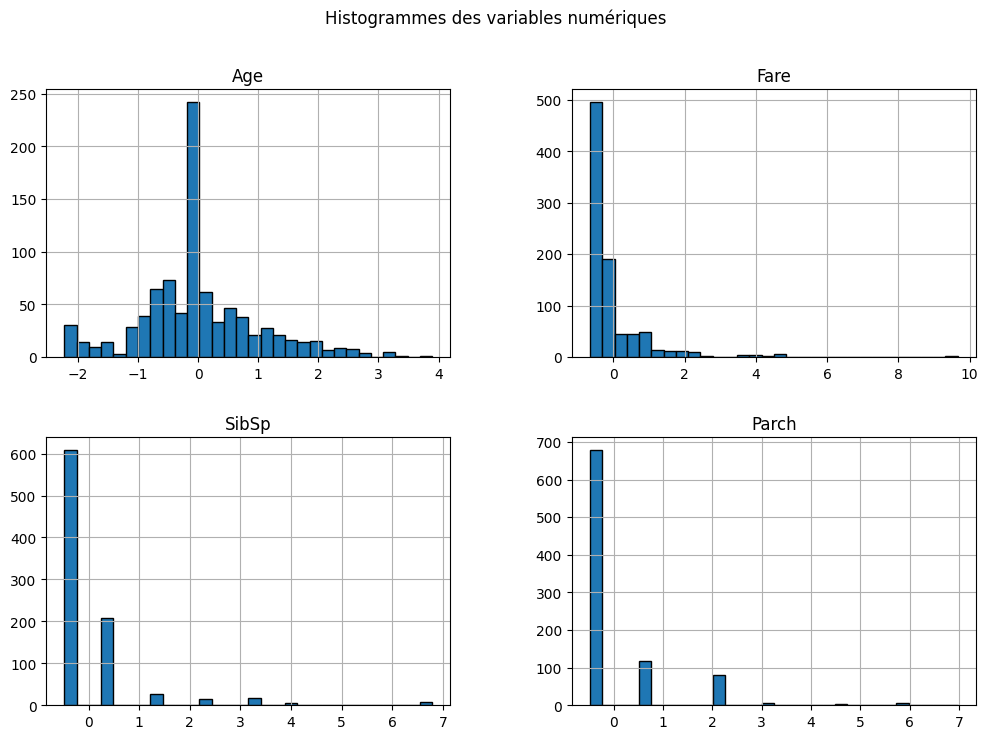

In [11]:
# Histogrammes pour toutes les variables numériques
plt.figure(figsize=(12, 8))
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables numériques')
plt.show()


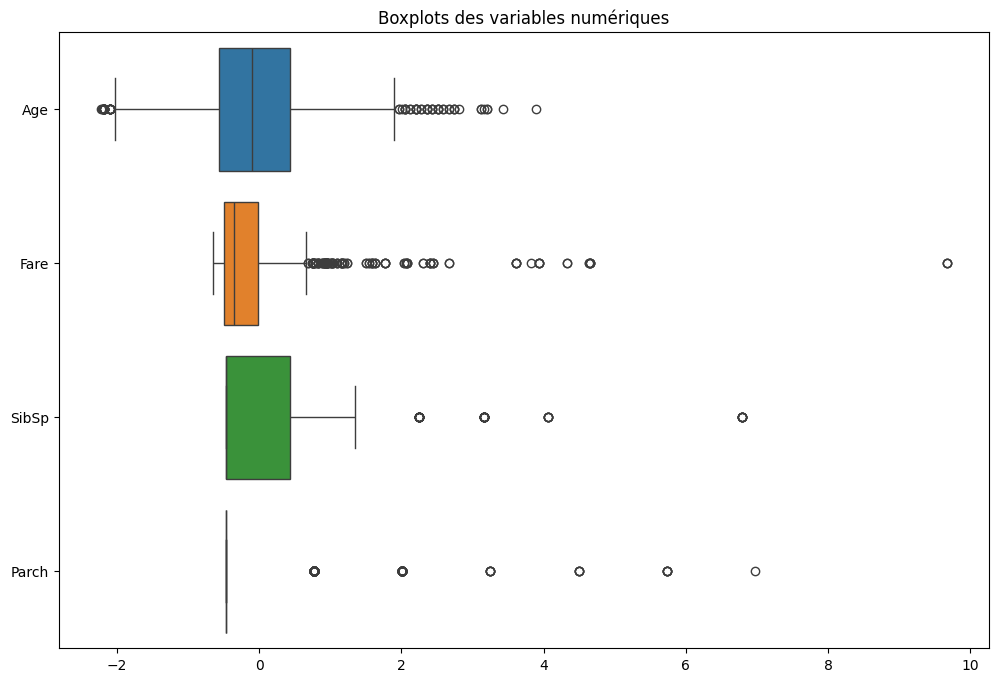

In [12]:
# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


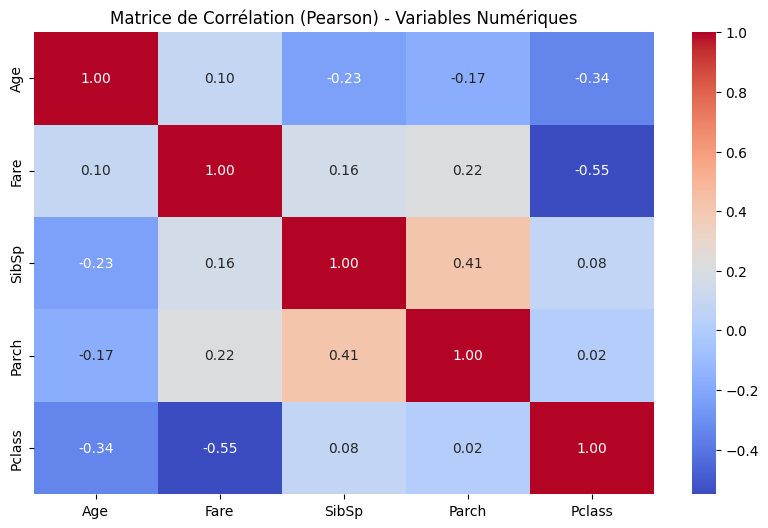

In [13]:
# Sélection des variables numériques
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]  # Pclass est ordinal, on peut le considérer ici aussi

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()


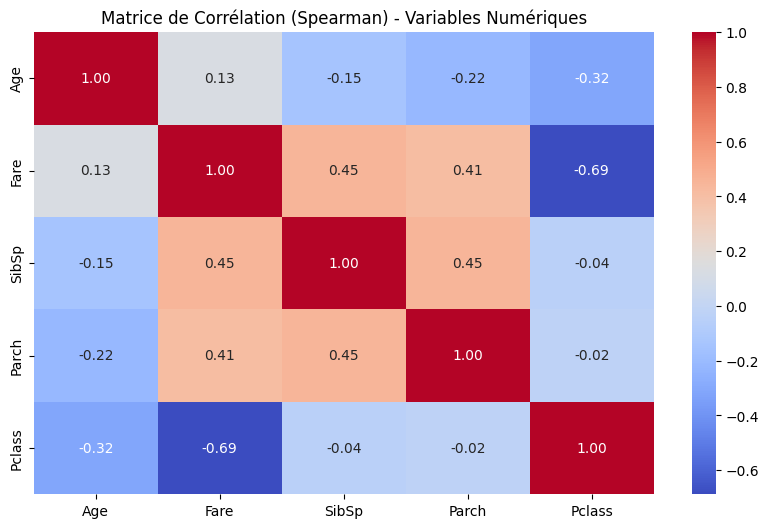

In [14]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


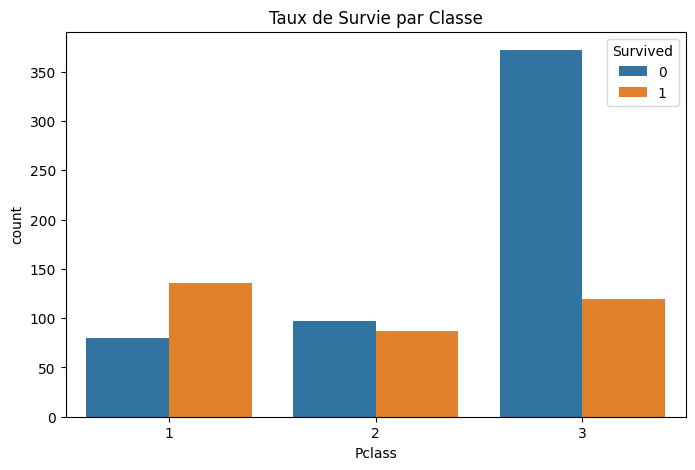

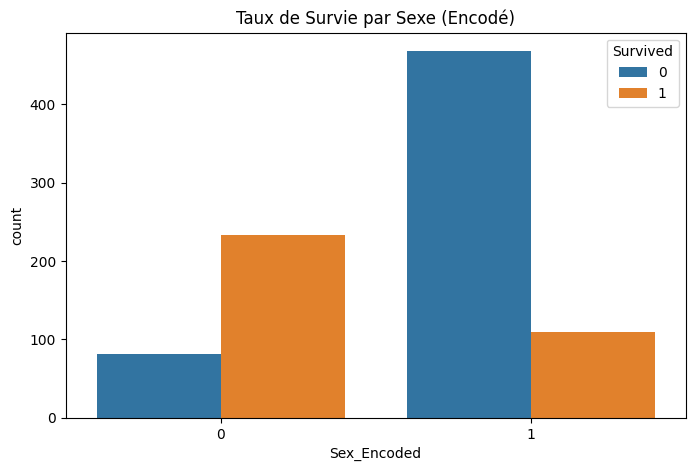

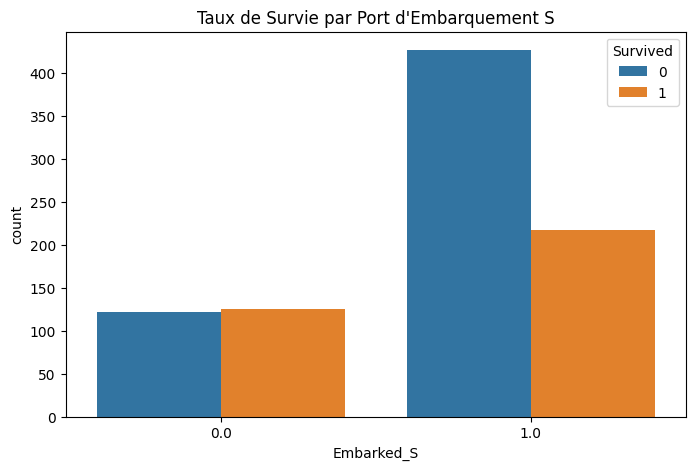

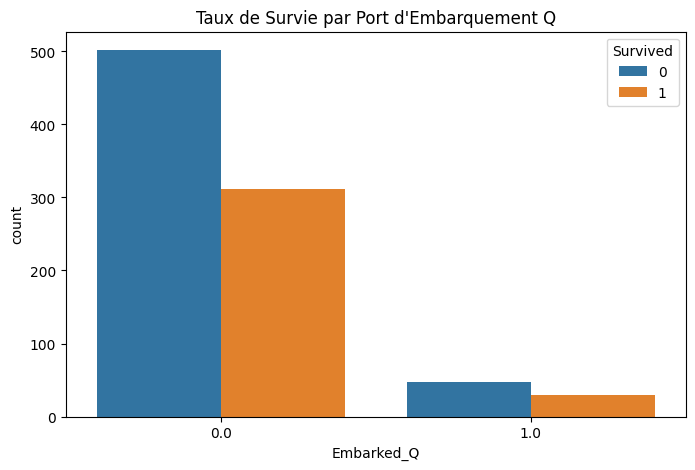

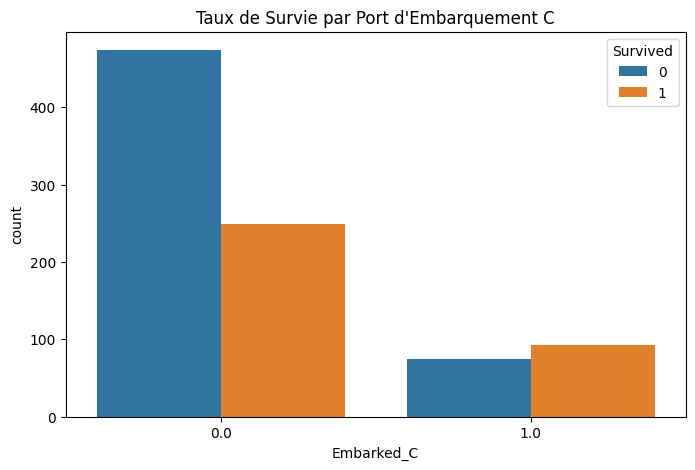

In [15]:
# Countplot pour voir la répartition des survivants selon la classe
plt.figure(figsize=(8, 5))
print(df.columns)

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Taux de Survie par Classe")
plt.show()

# Countplot pour voir la répartition des survivants selon le sexe
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex_Encoded", hue="Survived", data=df)
plt.title("Taux de Survie par Sexe (Encodé)")
plt.show()

# Countplot pour voir la répartition des survivants selon le port d'embarquement
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement S")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement Q")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_C", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement C")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

df_final = df[['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Afficher le DataFrame final
print(df_final.head())

   Survived  Pclass  Sex_Encoded       Age      Fare     SibSp     Parch  \
0         0       3            1 -0.565736 -0.502445  0.432793 -0.473674   
1         1       1            0  0.663861  0.786845  0.432793 -0.473674   
2         1       3            0 -0.258337 -0.488854 -0.474545 -0.473674   
3         1       1            0  0.433312  0.420730  0.432793 -0.473674   
4         0       3            1  0.433312 -0.486337 -0.474545 -0.473674   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [17]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.752826      0.767255       0.788274  0.772388   
Forêt Aléatoire             0.789794      0.802568       0.802739  0.798507   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.794555      0.807384       0.799232  0.805970   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.723214  0.729730  0.726457  0.765450  
Forêt Aléatoire          0.787879  0.702703  0.742857  0.863316  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [18]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.765703      0.756019       0.789887  0.768657   
Forêt Aléatoire             0.796232      0.797753       0.804378  0.794776   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.792929      0.820225       0.807296  0.809701   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.724771  0.711712  0.718182  0.759109  
Forêt Aléatoire          0.769231  0.720721  0.744186  0.861852  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [19]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.756065      0.759230       0.788249  0.764925   
Forêt Aléatoire             0.789781      0.800963       0.809165  0.772388   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.789716      0.815409       0.807271  0.809701   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.718182  0.711712  0.714932  0.755810  
Forêt Aléatoire          0.727273  0.720721  0.723982  0.867447  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [20]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Import des bibliothèques nécessaires
import pandas as pf

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [22]:
# Lire le fichier
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Afficher toutes les colonnes sans coupure
pf.set_option("display.max_columns", None)

# Afficher les premières lignes du dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
# Lire le fichier bank-additional-full.csv
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Vérifier toutes les colonnes (catégorielles et numériques)
all_columns = df.columns

# Rechercher "unknown" dans toutes les colonnes
unknown_counts = df[all_columns].apply(lambda col: (col.astype(str) == "unknown").sum())

# Affichage des résultats pour toutes les colonnes, même celles sans "unknown"
print("Nombre de valeurs 'unknown' dans chaque colonne :")
print(unknown_counts)


Nombre de valeurs 'unknown' dans chaque colonne :
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [24]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Charger le fichier bank-additional-full.csv
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Afficher les colonnes disponibles avant encodage
print("\n Colonnes AVANT encodage :")
print(df.columns.tolist())

# Liste des colonnes à encoder
one_hot_cols = ["job", "marital", "contact", "poutcome", "month", "day_of_week"]
label_col = "education"

# Vérifier quelles colonnes sont réellement disponibles
available_one_hot_cols = [col for col in one_hot_cols if col in df.columns]
available_label_col = label_col if label_col in df.columns else None

if available_one_hot_cols or available_label_col:

    # **1. Label Encoding pour "education" (si elle existe)**
    if available_label_col:
        label_encoder = LabelEncoder()
        df["education_encoded"] = label_encoder.fit_transform(df["education"].astype(str))
        df.drop(columns=["education"], inplace=True)  # Supprimer l'ancienne colonne après encodage

    # **2. One-Hot Encoding pour les colonnes disponibles**
    if available_one_hot_cols:
        one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")  # ✅ Correction ici

        encoded_matrix = one_hot_encoder.fit_transform(df[available_one_hot_cols])

        # Convertir en DataFrame avec les bons noms de colonnes
        encoded_df = pd.DataFrame(encoded_matrix, columns=one_hot_encoder.get_feature_names_out(available_one_hot_cols))

        # Ajouter les nouvelles colonnes encodées au DataFrame original
        df = pd.concat([df, encoded_df], axis=1)

        # **Supprimer uniquement les colonnes qui ont été encodées**
        df.drop(columns=available_one_hot_cols, inplace=True)

    # **Vérification après encodage**
    print("\n Colonnes APRÈS encodage :")
    print(df.columns.tolist())

    # **Aperçu des données après encodage**
    print("\n Aperçu du dataset après encodage :")
    print(df.head())

    # Vérifier les valeurs "unknown" restantes
    unknown_counts_after = df.apply(lambda col: (col == "unknown").sum())
    print("\n Nombre de valeurs 'unknown' par colonne après encodage :")
    print(unknown_counts_after[unknown_counts_after > 0])

else:
    print(" Aucune des colonnes nécessaires pour l'encodage n'est présente dans le fichier.")



 Colonnes AVANT encodage :
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

 Colonnes APRÈS encodage :
['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'education_encoded', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

 Ape

In [25]:
# Vérifier les colonnes du DataFrame
print(" Colonnes du DataFrame :", df.columns)

# Vérifier les valeurs "unknown" avant imputation
print("\n Nombre de valeurs 'unknown' avant imputation :")
unknown_counts_before = df.apply(lambda col: (col == "unknown").sum())
print(unknown_counts_before[unknown_counts_before > 0])

# Imputation des colonnes catégorielles (remplacement des "unknown" par la valeur la plus fréquente)
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    if (df[col] == "unknown").sum() > 0:
        df[col] = df[col].replace("unknown", df[col].mode()[0])  # Remplacement par le mode (valeur la plus fréquente)

# Vérifier les valeurs "unknown" après imputation
print("\n Nombre de valeurs 'unknown' après imputation :")
unknown_counts_after = df.apply(lambda col: (col == "unknown").sum())
print(unknown_counts_after[unknown_counts_after > 0])


🚀 Colonnes du DataFrame : Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'education_encoded', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

 Nombre de valeurs 'unknown' avant imputation :
default    8597
housing     990
loan        990
dtype: int64

 Nombre de valeurs 'unknown' après imputation :
Series([], dtype: int6

In [26]:
# ** Sélection des colonnes numériques à standardiser**
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# ** Standardisation avec StandardScaler**
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ** Vérification des résultats**
print("\n Moyenne après standardisation (doit être proche de 0) :")
print(df[numerical_cols].mean())

print("\n Écart-type après standardisation (doit être proche de 1) :")
print(df[numerical_cols].std())

# ** Affichage des premières lignes après standardisation**
print("\n Aperçu des données après standardisation :")
print(df.head())


 Moyenne après standardisation (doit être proche de 0) :
age                    -1.880382e-16
duration               -1.397348e-17
campaign               -7.590531e-17
pdays                  -2.580781e-16
previous                5.520386e-18
emp.var.rate            7.797546e-17
cons.price.idx         -3.315820e-14
cons.conf.idx          -1.352495e-16
euribor3m               0.000000e+00
nr.employed            -1.024860e-14
education_encoded      -5.382377e-17
job_blue-collar         5.002850e-17
job_entrepreneur        6.089676e-17
job_housemaid           3.363985e-18
job_management          3.993655e-17
job_retired             9.660676e-18
job_self-employed      -2.768819e-17
job_services            2.742942e-17
job_student            -2.484174e-17
job_technician          1.108606e-16
job_unemployed         -2.492799e-17
job_unknown             5.442756e-17
marital_married        -1.476703e-16
marital_single          8.177072e-17
marital_unknown        -2.764506e-17
contact_telephone

In [27]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.397348e-17 -7.590531e-17 -2.580781e-16  5.520386e-18   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -5.149443e+00 -3.494943e-01   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01  1.954139e-01 -3.494943e-01   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01  1.954139e-01 -3.494943e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01  1.954139e-01 -3.494943e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.954139e-01  1.379492e+01   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  4.118800e+04    4.118800e+04   4.118800e+04  41188.000000   
mean   7.797546e-17   -3.315820e-14  -1.352495e-16      0.000000   
std    1.000012e+00    1.000012e+00   1.000012e+00      1.000012   
min   -2.216433e

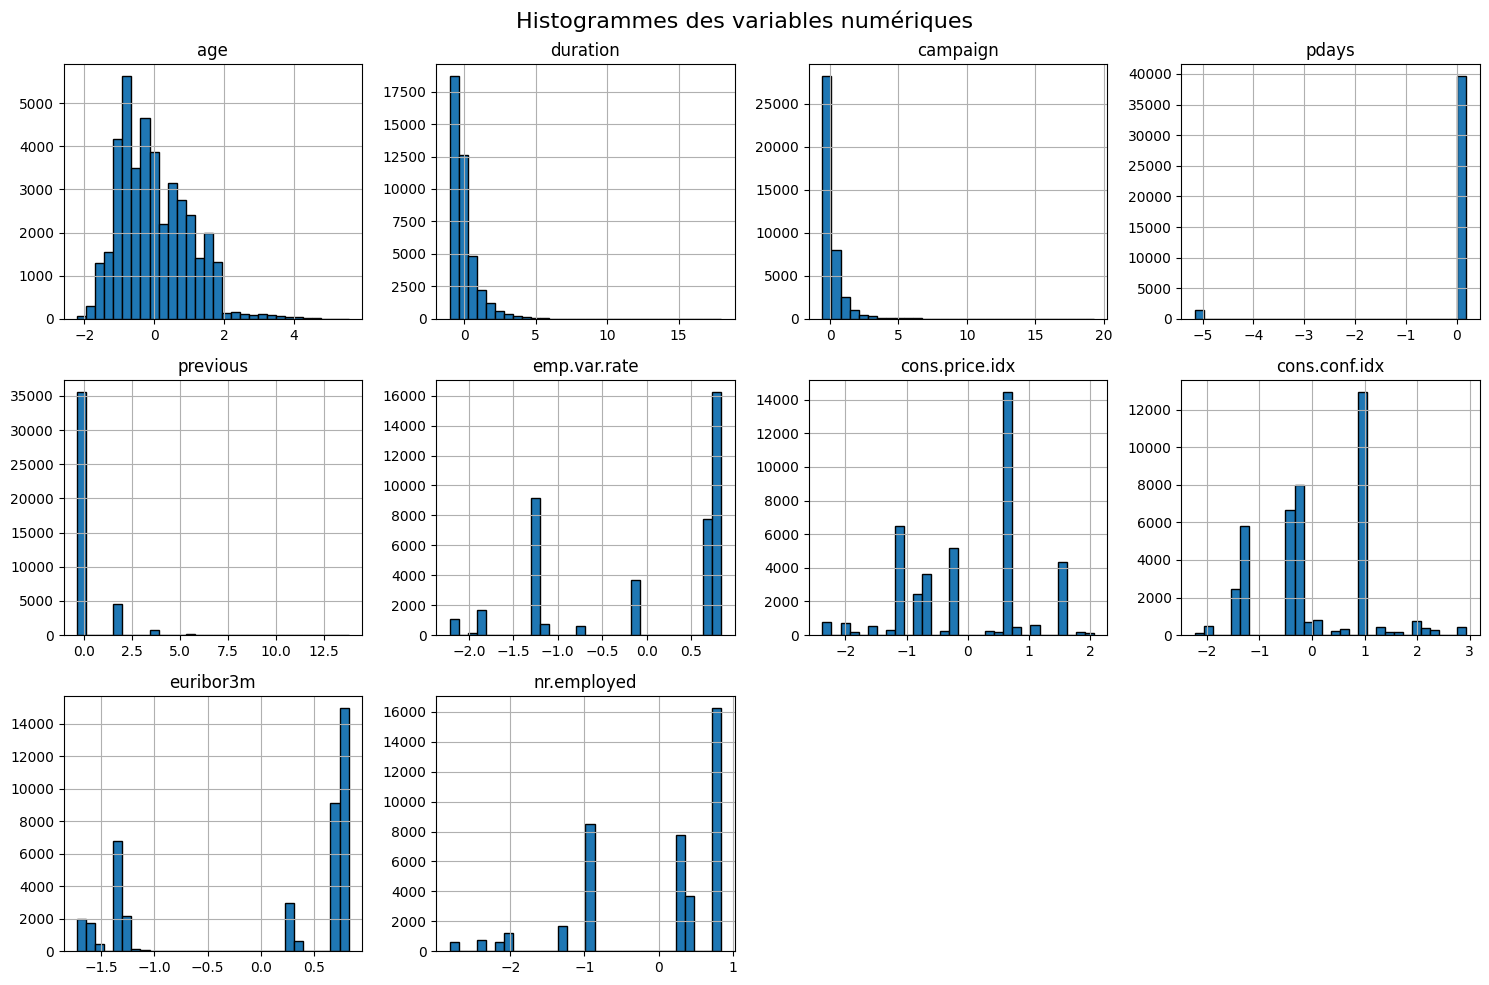

In [28]:
import matplotlib.pyplot as plt

# ** Définition des variables numériques**
numerical_cols = [
    "age", "duration", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

# ** Vérifier que les colonnes existent dans le dataset avant de tracer**
numerical_cols = [col for col in numerical_cols if col in df.columns]

# ** Création des histogrammes avec des subplots**
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Ajuste la grille selon le nombre de variables
axes = axes.flatten()  # Convertir en liste 1D pour une itération plus facile

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, edgecolor='black', ax=axes[i])  # Tracer l'histogramme
    axes[i].set_title(col)  # Ajouter le titre

# Supprimer les éventuels sous-graphiques vides si moins de 12 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# ** Affichage final**
plt.suptitle('Histogrammes des variables numériques', fontsize=16)
plt.tight_layout()
plt.show()


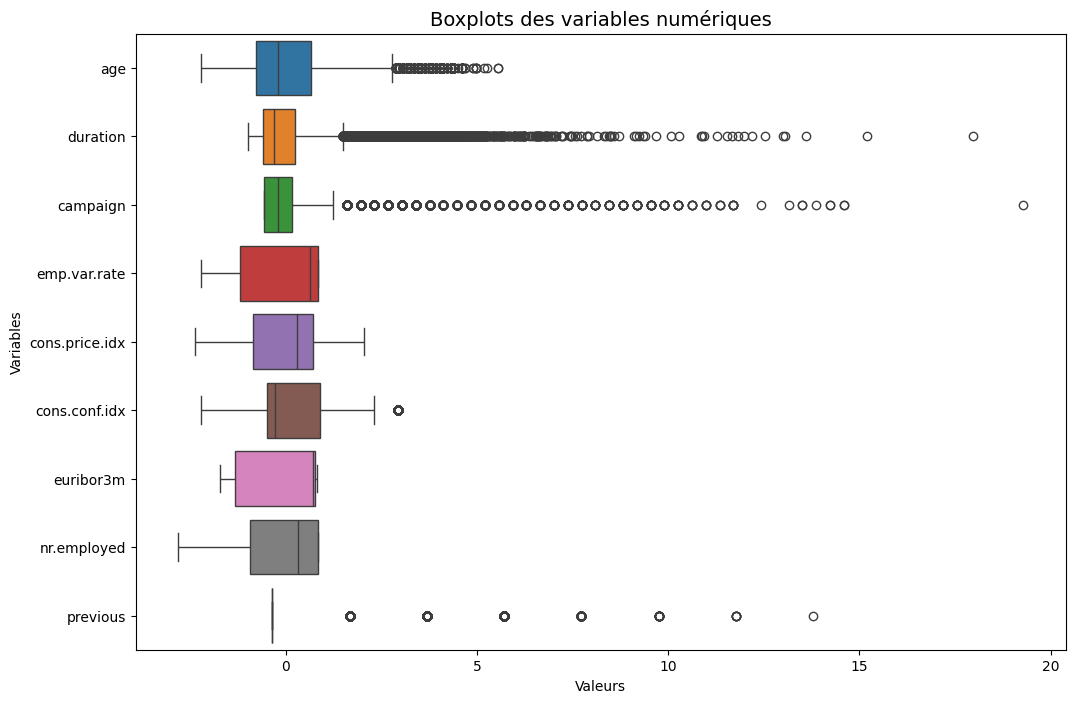

In [29]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# ** Sélection des colonnes spécifiques pour le boxplot**
selected_columns = [
    "age", "duration", "campaign", "emp.var.rate", 
    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"
]

# ** Vérifier que les colonnes existent dans le dataset**
selected_columns = [col for col in selected_columns if col in df.columns]

# ** Création du boxplot horizontal pour toutes les variables sélectionnées**
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_columns], orient='h')  # Affichage horizontal
plt.title('Boxplots des variables numériques', fontsize=14)
plt.xlabel('Valeurs')
plt.ylabel('Variables')
plt.show()


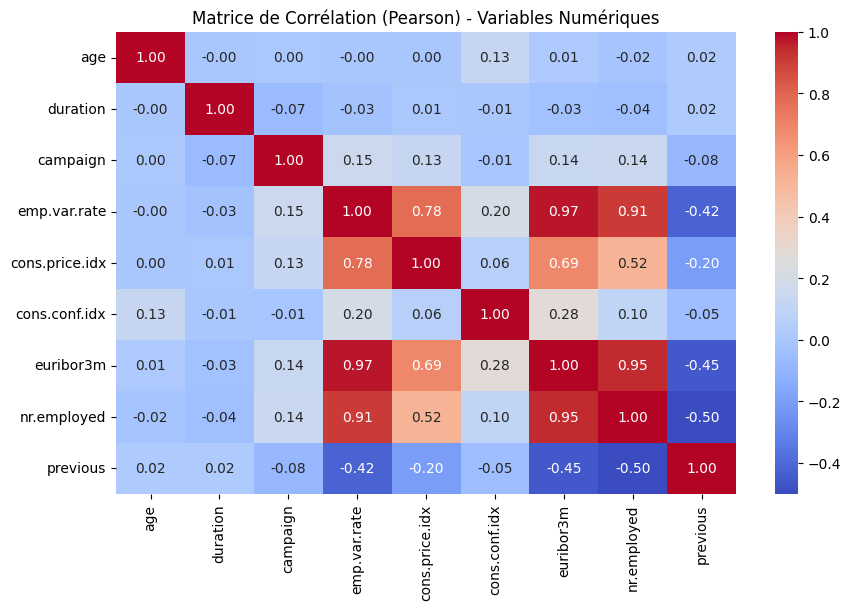

In [30]:
# Sélection des variables numériques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()

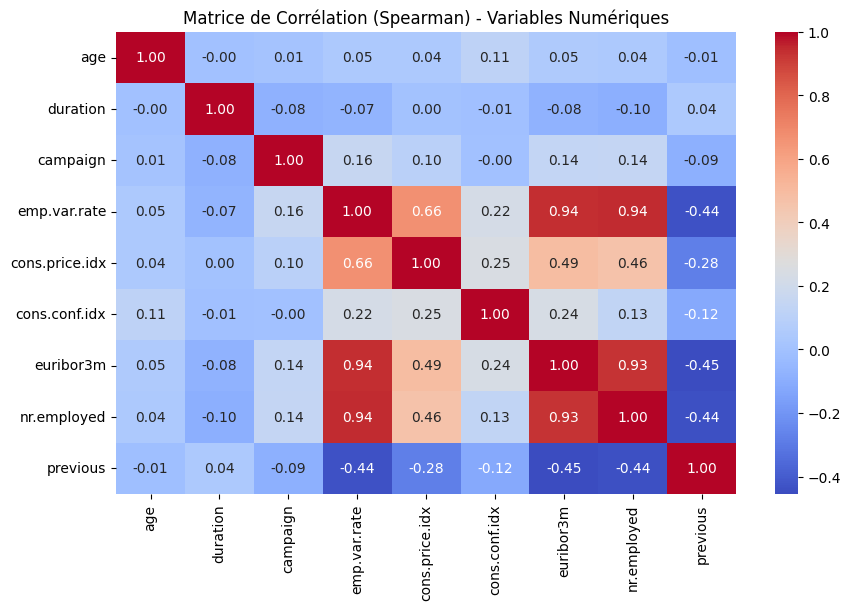

In [31]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

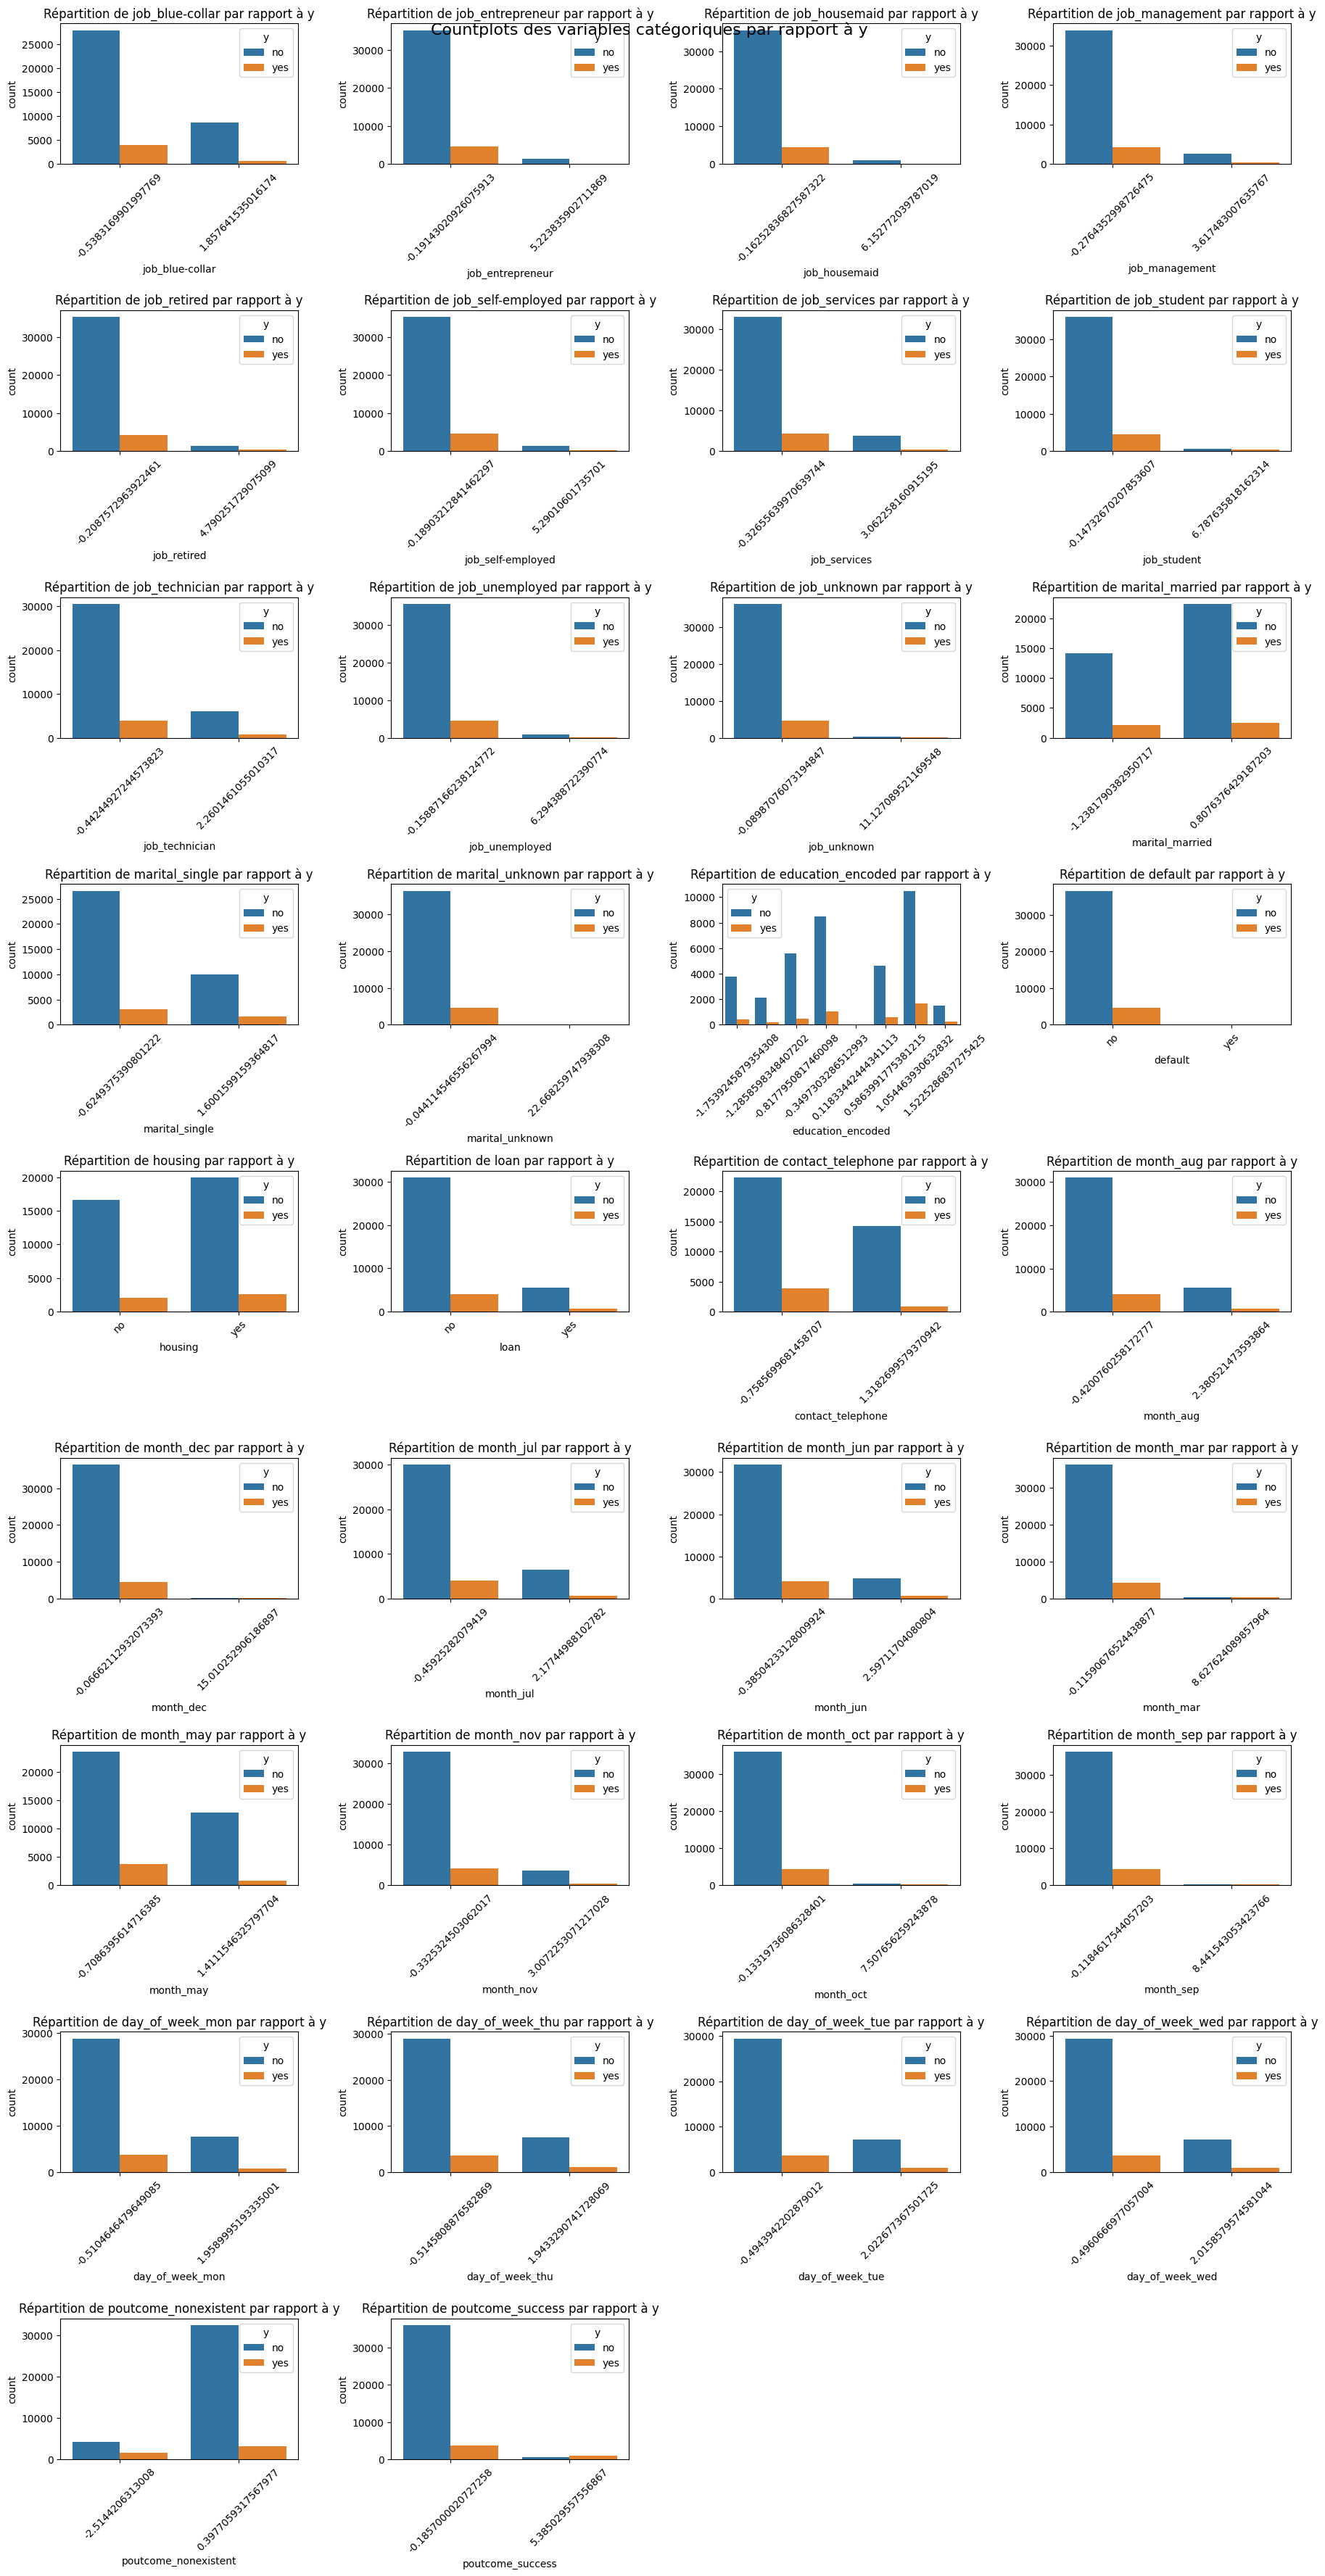

In [32]:
# Import des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
import math  # Pour calculer le bon nombre de subplots

# ** Sélection des variables catégoriques**
original_categorical_cols = ["job", "marital", "education_encoded", "default", "housing", 
                             "loan", "contact", "month", "day_of_week", "poutcome"]

# ** Vérification des colonnes existantes et récupération des colonnes encodées**
categorical_cols = []
for col in original_categorical_cols:
    if col in df.columns:  # Si la colonne existe encore sous sa forme originale
        categorical_cols.append(col)
    else:  # Si elle a été One-Hot Encodée, récupérer les colonnes associées
        categorical_cols.extend([encoded_col for encoded_col in df.columns if col in encoded_col])

# ** Définition dynamique du nombre de lignes et colonnes**
num_vars = len(categorical_cols)
num_cols = 4  # Fixe à 4 colonnes pour un bon affichage
num_rows = math.ceil(num_vars / num_cols)  # Calcul automatique des lignes nécessaires

# **Création des countplots**
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 4))  # Ajustement dynamique
axes = axes.flatten()  # Conversion en liste 1D pour une itération facile

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="y", ax=axes[i])
    axes[i].set_title(f"Répartition de {col} par rapport à y")
    axes[i].tick_params(axis='x', rotation=45)  # Rotation des labels pour lisibilité

# ** Supprimer les sous-graphiques vides s'il y a moins de cases nécessaires**
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# ** Affichage final**
plt.suptitle("Countplots des variables catégoriques par rapport à y", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# **Vérification et séparation des données**
if "y" in df.columns:
    df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)

# Sélection automatique des features (uniquement les variables numériques)
X = df.select_dtypes(include=["number"]).drop(columns=["y"])  
y = df["y"]

# **2️⃣ Séparation train/test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ** Normalisation des données**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Sélection des modèles**
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Réseaux de Neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# ** Entraînement et évaluation des modèles**
results = {}
for name, model in models.items():
    # Validation croisée
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Score AUC-ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# **6️⃣ Affichage des résultats**
results_df = pd.DataFrame(results).T

# Vérification et affichage
if not results_df.empty:
    print("\n Résultats des modèles :")
    print(results_df)
else:
    print("\n Aucun résultat à afficher. Vérifie que les modèles sont bien entraînés.")

# Optionnel : Affichage dans une interface utilisateur (si disponible)
import ace_tools as tools
tools.display_dataframe_to_user(name="Résultats des modèles", dataframe=results_df)


In [36]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ** Encodage des variables catégoriques**
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)

# One-Hot Encoding des variables catégoriques
categorical_cols = ["job", "marital", "education", "default", "housing", 
                    "loan", "contact", "month", "day_of_week", "poutcome"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# **Séparation des données en X (features) et y (cible)**
X = df.drop(columns=["y"])  # Exclure la cible
y = df["y"]

# **Séparation du dataset en train (70%) et test (30%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Normalisation des données**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Sélection des modèles optimisés**
models = {
    "Régression Logistique": LogisticRegression(max_iter=5000),  # Augmentation du nombre d'itérations
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Réseaux de Neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# **Entraînement et évaluation des modèles**
results = {}
for name, model in models.items():
    # **Validation croisée uniquement à 5 folds pour réduire le temps**
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

    # **Entraînement du modèle**
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # **Calcul des métriques**
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # **Calcul du score AUC-ROC**
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)

    # **Stockage des résultats**
    results[name] = {
        "CV (5 folds)": cv_5,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# ** Affichage des résultats**
import ace_tools as tools
results_df = pd.DataFrame(results).T
tools.display_dataframe_to_user(name="Résultats des modèles", dataframe=results_df)


KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'day_of_week', 'poutcome'],\n      dtype='object')] are in the [columns]"